In [1]:
import graphlab

# Work with Philadelphia crime rate data

The dataset has information about the house prices in Philadelphia, additionally, has information about the crime rates in various neighborhoods. So we can see some interesting observations in this dataset as follows

## Load data and do initial analysis

In [2]:
crime_rate_data =  graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

[INFO] This non-commercial license of GraphLab Create is assigned to akshay.narayan@u.nus.edu and will expire on September 26, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-20688 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1458051248.log
[INFO] GraphLab Server Version: 1.6.1


PROGRESS: Finished parsing file /home/anarayan/Workspace/pyDataAnalysis/ml-regression/week1/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.00885 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /home/anarayan/Workspace/pyDataAnalysis/ml-regression/week1/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.0119 secs.


In [3]:
crime_rate_data

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [4]:
graphlab.canvas.set_target('ipynb')

In [5]:
crime_rate_data.show(view='Scatter Plot', x = "CrimeRate", y = "HousePrice")

## Fit the regression model using crime rate as the feature

In [6]:
crime_model = graphlab.linear_regression.create(crime_rate_data, 
                                               target = 'HousePrice',
                                               features = ['CrimeRate'],
                                               validation_set = None, 
                                               verbose = False)

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

### Look at the fit of the (initial) model

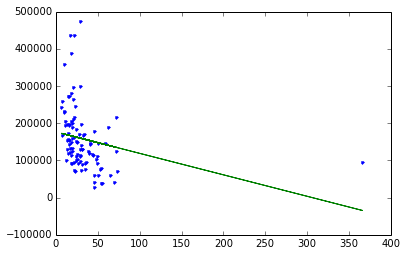

In [9]:
plt.plot(crime_rate_data['CrimeRate'], crime_rate_data['HousePrice'],
        '.', crime_rate_data['CrimeRate'], 
         crime_model.predict(crime_rate_data), '-')

We can see that there is an outlier in the data, where the crime rate is high, but still, the house price is higher, hence not following the trend. This point is the center of the city (Center City data point)

### Remove the Center CIty value, and re do the analysis

Center City is one observation with extremely high crime rate and high house prices. This is an outlier in some sense. So we can remove this and re fit the model

In [10]:
crime_rate_data_noCC = crime_rate_data[crime_rate_data['MilesPhila'] != 0.0]

In [11]:
crime_rate_data_noCC.show(view='Scatter Plot', x = "CrimeRate", y = "HousePrice")

Notice the difference in the previous scatter plot and this one after removing the outlier (city center)

In [12]:
crime_model_withNoCC = graphlab.linear_regression.create(crime_rate_data_noCC,
                                                        target = 'HousePrice',
                                                        features = ['CrimeRate'],
                                                        validation_set = None,
                                                        verbose = False)

### Look at the fit of the model with outlier removed

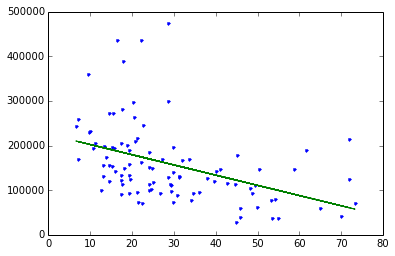

In [14]:
plt.plot(crime_rate_data_noCC['CrimeRate'], crime_rate_data_noCC['HousePrice'], '.', 
         crime_rate_data_noCC['CrimeRate'], crime_model_withNoCC.predict(crime_rate_data_noCC), '-')

#### Compare coefficients for full data fit Vs. data with CenterCity removed

In [15]:
crime_model.get('coefficients')

name,index,value
(intercept),None,176626.046881
CrimeRate,None,-576.804949058


In [16]:
crime_model_withNoCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


## Remove high-value outlier neighborhoods and redo analysis

In [17]:
crime_rate_data_noHighEnd = crime_rate_data_noCC[crime_rate_data_noCC['HousePrice'] < 350000]

In [18]:
crime_model_noHighEnd = graphlab.linear_regression.create(crime_rate_data_noHighEnd, 
                                                         target = 'HousePrice', 
                                                         features = ['CrimeRate'], 
                                                         validation_set = None,
                                                         verbose = False)

#### How much do the coefficients change?

In [19]:
crime_model_withNoCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


In [20]:
crime_model_noHighEnd.get('coefficients')

name,index,value
(intercept),None,199073.589615
CrimeRate,None,-1837.71280989


We see that removing outliers wrt high-value neighborhoods has some effect on the fit but not as much as the high-leverate City Center data point. Hence, high leverage points may be much stronger candidates for influential observations but outliers may not be so.